## Loading Data

In [187]:
from sklearn.datasets import load_iris
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Create features and target numpy arrays
features = df_iris[iris.feature_names]
X = df_iris[iris.feature_names].values
target = df_iris['target']
y = df_iris['target'].values

print(features.head(6))
# print(X)
print(target.head(6))
# print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
0    0
1    0
2    0
3    0
4    0
5    0
Name: target, dtype: int64


In [188]:
import torch
from torch.utils.data import TensorDataset

dataset = TensorDataset(torch.tensor(X), torch.tensor(y))
dataset
type(dataset)




torch.utils.data.dataset.TensorDataset

In [189]:
a, b = dataset[0]
print(dataset[0])
print(a)
print(b)


(tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), tensor(0))
tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64)
tensor(0)


In [190]:
from torch.utils.data import DataLoader

batch_size = 2 # determine how many samples are included in each iteration (efficient training)
shuffle = True # randomize training data at each epoch for model generalization (avoid overfitting)
# 1 epoch is the full pass through the training data loader

dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = shuffle)

my_count = 0
for batch_inputs, batch_labels in dataloader: # iterate over a tuple
    my_count += 1
    print("="*80)
    print("my_count = ", my_count)
    print("batch_inputs: ", batch_inputs)
    print("batch_labels: ", batch_labels)



my_count =  1
batch_inputs:  tensor([[6.8000, 3.2000, 5.9000, 2.3000],
        [5.0000, 3.6000, 1.4000, 0.2000]], dtype=torch.float64)
batch_labels:  tensor([2, 0])
my_count =  2
batch_inputs:  tensor([[5.9000, 3.2000, 4.8000, 1.8000],
        [5.2000, 3.5000, 1.5000, 0.2000]], dtype=torch.float64)
batch_labels:  tensor([1, 0])
my_count =  3
batch_inputs:  tensor([[5.8000, 2.7000, 5.1000, 1.9000],
        [6.4000, 3.2000, 5.3000, 2.3000]], dtype=torch.float64)
batch_labels:  tensor([2, 2])
my_count =  4
batch_inputs:  tensor([[5.9000, 3.0000, 4.2000, 1.5000],
        [6.0000, 2.2000, 4.0000, 1.0000]], dtype=torch.float64)
batch_labels:  tensor([1, 1])
my_count =  5
batch_inputs:  tensor([[7.2000, 3.2000, 6.0000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000]], dtype=torch.float64)
batch_labels:  tensor([2, 0])
my_count =  6
batch_inputs:  tensor([[5.6000, 3.0000, 4.1000, 1.3000],
        [7.7000, 2.6000, 6.9000, 2.3000]], dtype=torch.float64)
batch_labels:  tensor([1, 2])
my_count =

## First Training Loop

Training Process So Far:
- Create a model
- Choose a loss function
- Define a dataset
- Set an optimizer
- Run a training loop
    - Calculate Loss (forward pass)
    - Compute Gradients (backpropogation)
    - Update model parameters

In [191]:
import seaborn as sns
import pandas as pd

# Load the mtcars dataset
df_mtcars = sns.load_dataset('mpg')
# Rename 'mpg' column to 'target' for consistency
df_mtcars = df_mtcars.rename(columns={'mpg': 'target'})

# Select feature columns (exclude target and non-numeric columns)
feature_cols = [col for col in df_mtcars.columns if col != 'target' and col != 'name' and df_mtcars[col].dtype in ['float64', 'int64']]

# Create features and target numpy arrays
features = df_mtcars[feature_cols]
X = df_mtcars[feature_cols].values
target = df_mtcars['target']
y = df_mtcars['target'].values

print(features.head(6))
# print(X)
print(target.head(6))
# print(y)

   cylinders  displacement  horsepower  weight  acceleration  model_year
0          8         307.0       130.0    3504          12.0          70
1          8         350.0       165.0    3693          11.5          70
2          8         318.0       150.0    3436          11.0          70
3          8         304.0       150.0    3433          12.0          70
4          8         302.0       140.0    3449          10.5          70
5          8         429.0       198.0    4341          10.0          70
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: target, dtype: float64


In [192]:
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())
dataset

dataloader = DataLoader(dataset, batch_size = 4, shuffle = True)
dataloader

In [193]:
import torch
import torch.nn as nn
import torch.optim as optim

my_model = nn.Sequential(
    nn.Linear(6,2),
    nn.Linear(2,1)
)

# Create Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(my_model.parameters(), lr = 0.001) 

##### Training Loop

In [194]:
def show_results(model, dataloader):
    model.eval()
    iter_loader = iter(dataloader)
    for _ in range(3):
        print("="*80)
        feature, target = next(iter_loader)
        preds = model(feature)
        for p, t in zip(preds, target):
            print(f'Ground truth: {t.item():.3f}. Predicted: {p.item():.3f}.')

In [195]:
# todo: epoch is looping through entire dataset once
num_epochs = 10 # todo: how do we determine how many total epochs
for epoch in range(num_epochs):
    for data in dataloader:
        # set the gradients to zero
        optimizer.zero_grad()

        # get feature and target from data loader
        feature, target = data
        
        # Run a forward pass
        pred = my_model(feature)

        # Compute loss and gradient
        loss = criterion(pred, target)
        loss.backward()

        # update the parameters
        optimizer.step()
show_results(my_model, dataloader) # todo: fix this function, nan being printed

C:\Users\Delulu Lemon\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Delulu Lemon\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Ground truth: 23.000. Predicted: nan.
Ground truth: 18.000. Predicted: nan.
Ground truth: 12.000. Predicted: nan.
Ground truth: 15.500. Predicted: nan.
Ground truth: 31.000. Predicted: nan.
Ground truth: 20.000. Predicted: nan.
Ground truth: 20.500. Predicted: nan.
Ground truth: 20.500. Predicted: nan.
Ground truth: 19.000. Predicted: nan.
Ground truth: 20.500. Predicted: nan.
Ground truth: 13.000. Predicted: nan.
Ground truth: 29.800. Predicted: nan.


## ReLU Activation Functions



##### SS Functions
- softmax and sigmoid functions shrink the gradient too much
- Cause `vanishing gradient problem`
- Therefore, not ideal for hidden layers, but useful for final layers
- Illustration

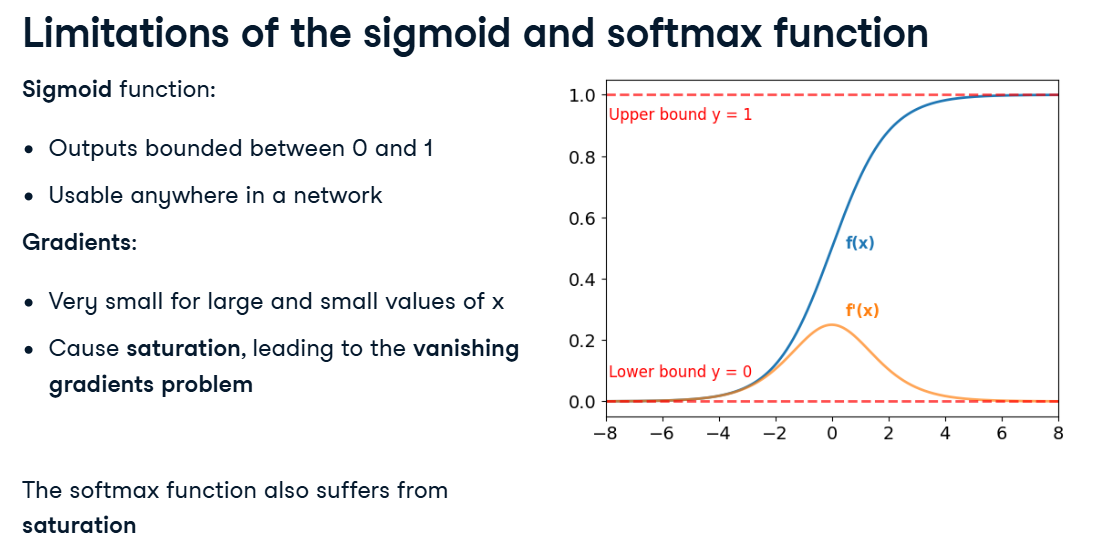


##### ReLU

- Rectified Linear Unit for hidden layers
- f(x) = max(x,0). Meaning x for positive x and 0 for negative x
- No upper bound, overcomes vanishing gradients problem 
- Illustration

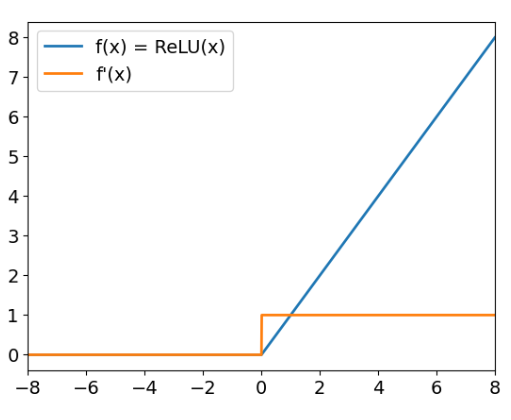

In [196]:
relu = nn.ReLU()

In [197]:
# Example Code:
relu_pytorch = nn.ReLU()

x_pos = torch.tensor(2.0)
x_neg = torch.tensor(-3.0)

# Apply the ReLU function to the tensors
output_pos = relu_pytorch(x_pos)
output_neg = relu_pytorch(x_neg)

print("ReLU applied to positive value:", output_pos)
print("ReLU applied to negative value:", output_neg)

ReLU applied to positive value: tensor(2.)
ReLU applied to negative value: tensor(0.)


##### Leaky ReLU

- In regular `ReLU`, for negative inputs, f(x) technically has a 0 multiplier, stopping neurons from learning altogether.
- Solution: `Leaky ReLU`
- For negative inputs, f(x) has a small multiplier to prevent static 0 value for negative inputs

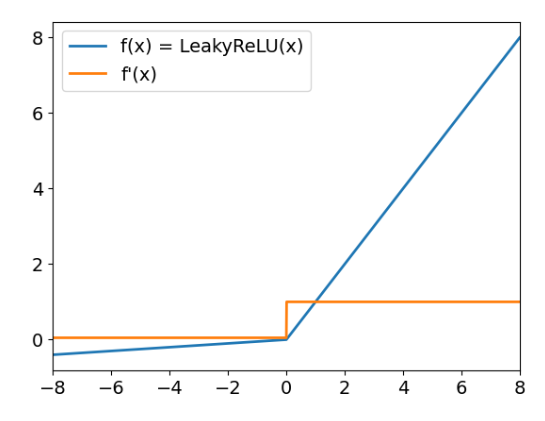


In [198]:
leaky_relu = nn.LeakyReLU(negative_slope = 0.05)
# negative_slope is the slope multiplier for negative x, defaults 0.01

In [199]:
# Example Code:
leaky_relu_pytorch = nn.LeakyReLU(negative_slope = 0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


## Learning Rate & Momemtum

##### Learning Rate
- Training a NN is same as solving an optimization problem (minimizing loss function while adjusting the model params)
- SDG is the practical optimizer used
- Learning Rate: controls the steps size for subsequent update
    - Too High = Poor Performance. Too Low = Too Slow
    - SDG: typically 0.01 to 0.1 without momentum, 0.001 to 0.1 with momentum , default value 0.001
    - Adam/AdamW optimizer: 0.001 (most common)
- Momentum: adds inertia to avoid getting stuck at local minima (typically , default value)
    - Momentum in SGD helps accelerate gradients along consistent directions and dampen oscillations. 
    - Loss Functions are non-convex typically, meaning high risk of converging at local minima (while we want global minima of loss function).
    - Typically 0.85–0.99 in real world. Too small = Optimizer stuck at local minima

 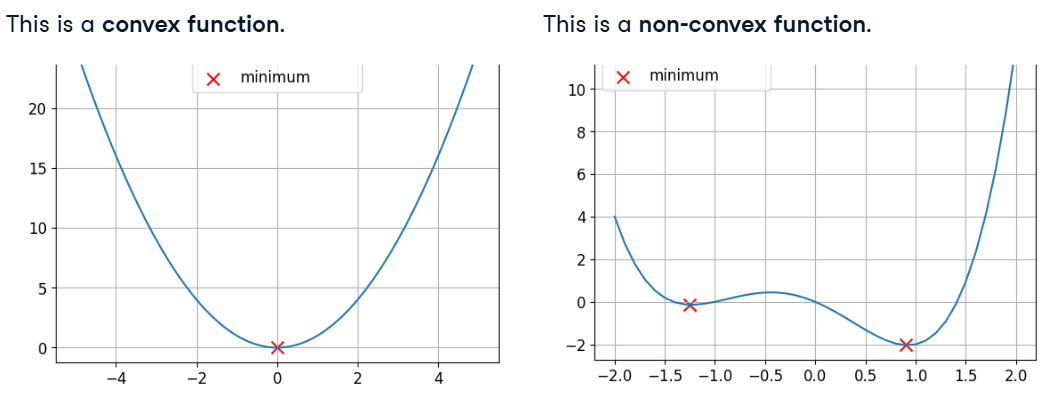


In [200]:
sgd = optim.SGD(my_model.parameters(), lr = 0.01, momentum = 0.95)
sgd

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.95
    nesterov: False
    weight_decay: 0
)

##### Optimization - Generic

In [201]:
def optimize_and_plot(lr=0.01, momentum=0.0):
    """
    Visualize the steps of SGD (optionally with momentum) for a single parameter.
    
    X-axis: Parameter value (weight)
    Y-axis: Loss / Objective function value
    """
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []

    # Simulate optimization steps
    for i in range(10):
        y = function(x)
        values.append((x.clone(), y.clone()))
        y.backward()

        d_p = x.grad.data
        if momentum != 0:
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer

        # SGD update
        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()
      
    # Function curve for visualization
    x_plot = np.arange(-3, 2, 0.001)
    y_plot = function(x_plot)

    # Plot setup
    plt.figure(figsize=(10, 5))

    # Optimizer steps
    plt.plot([v[0].detach().numpy() for v in values], 
             [v[1].detach().numpy() for v in values], 
             'r-X', linewidth=2, markersize=7, label='Optimizer steps')
    
    # Label each step
    for i in range(10):
        plt.text(values[i][0].detach().numpy() + 0.05,
                 values[i][1].detach().numpy(),
                 f'step {i}', color='r', fontsize=10)

    # Function / loss curve
    plt.plot(x_plot, y_plot, linewidth=2, label='Loss / Objective function')

    # Axes labels reflecting neural network terminology
    plt.xlabel("Parameter value (weight)", fontsize=12)
    plt.ylabel("Loss / Objective function value", fontsize=12)
    plt.title(f"SGD steps visualization (learning rate = {lr})", fontsize=14)
    
    plt.legend()
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()


In [202]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return x**4 + x**3 - 5*x**2

In [205]:
def plot_sgd_grid(learning_rates, momentums=[0.0], n_steps=10):
    """
    Visualize SGD steps for multiple learning rates and momentum values in a grid.
    
    Args:
        learning_rates: list of learning rates to visualize
        momentums: list of momentum coefficients
        n_steps: number of optimization steps to simulate
    """
    n_rows = len(learning_rates)   # Row per learning rate
    n_cols = len(momentums)        # Column per momentum

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

    for i, lr in enumerate(learning_rates):
        for j, momentum in enumerate(momentums):
            ax = axes[i][j]

            # Initialize parameter
            x = torch.tensor(2.0, requires_grad=True)
            buffer = torch.zeros_like(x.data)
            values = []

            # SGD simulation
            for step in range(n_steps):
                y = function(x)
                values.append((x.clone(), y.clone()))
                y.backward()

                d_p = x.grad.data
                if momentum != 0:
                    buffer.mul_(momentum).add_(d_p)
                    d_p = buffer

                x.data.add_(d_p, alpha=-lr)
                x.grad.zero_()

            # Function curve
            x_plot = np.arange(-3, 2, 0.001)
            y_plot = function(x_plot)

            # Plot optimizer steps
            ax.plot([v[0].detach().numpy() for v in values],
                    [v[1].detach().numpy() for v in values],
                    'r-X', linewidth=2, markersize=7, label='_nolegend_')

            # Annotate steps
            for k in range(n_steps):
                ax.text(values[k][0].detach().numpy() + 0.05,
                        values[k][1].detach().numpy(),
                        f'step {k}', color='r', fontsize=9)

            # Plot loss / function
            ax.plot(x_plot, y_plot, linewidth=2, label='_nolegend_')

            # Titles and axes
            ax.set_title(f"lr={lr}, momentum={momentum}", fontsize=12)
            ax.set_xlabel("Parameter value (weight)", fontsize=10)
            ax.set_ylabel("Loss / Objective function value", fontsize=10)
            ax.grid(True)
            ax.tick_params(axis='both', which='major', labelsize=9)

    plt.tight_layout()
    plt.show()


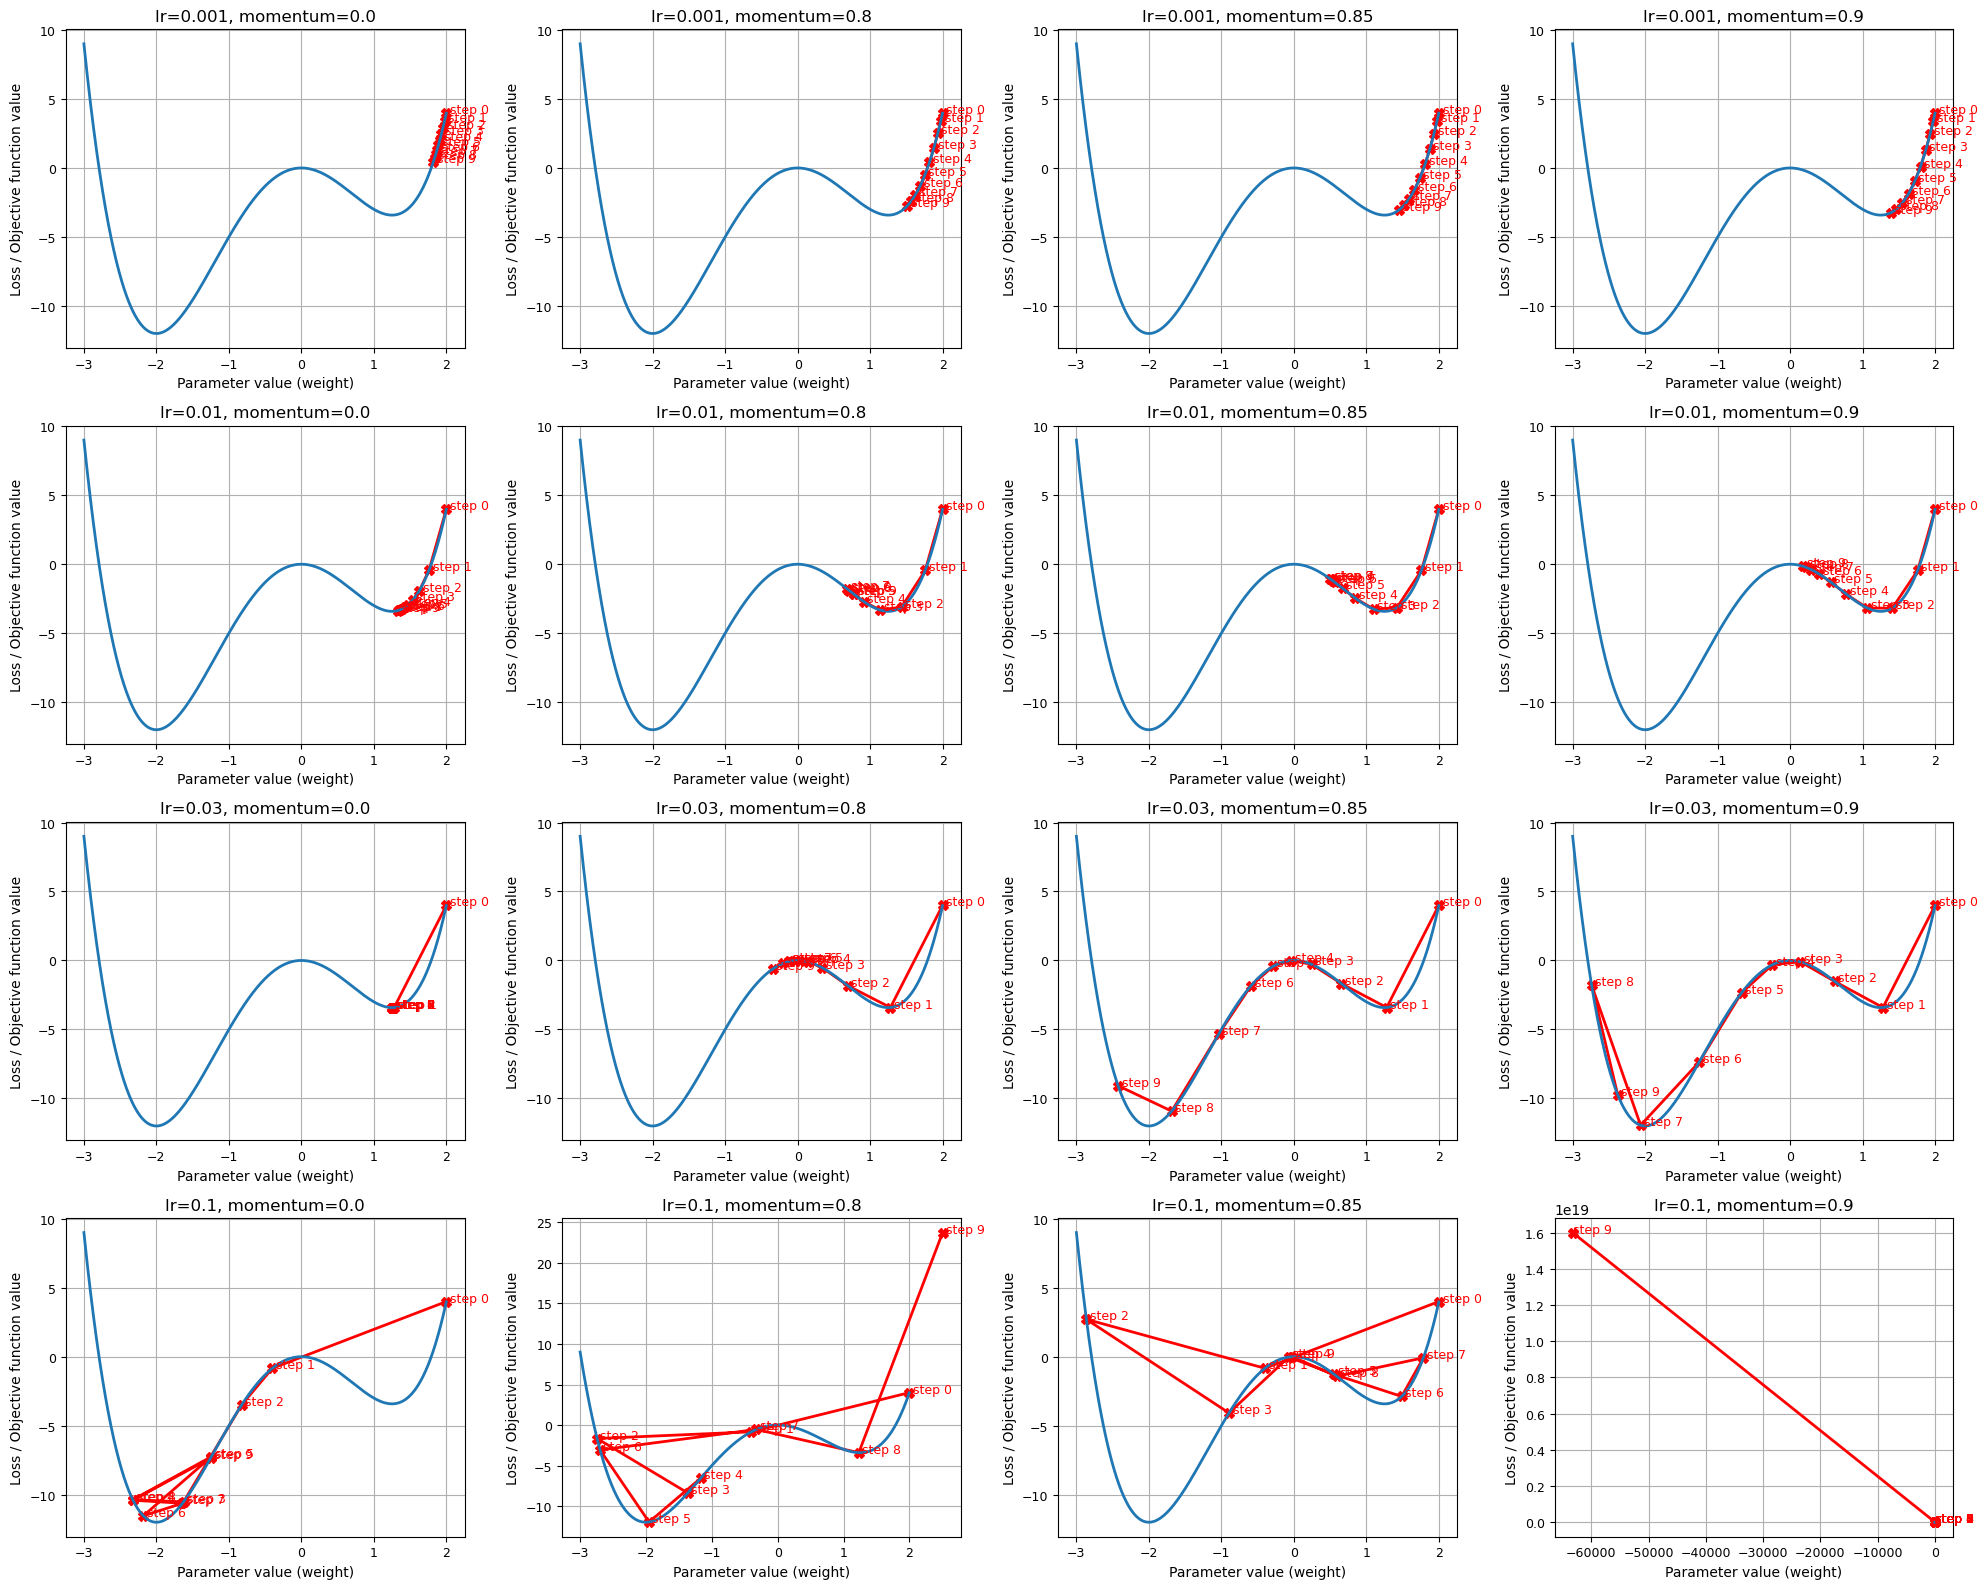

In [209]:
learning_rates = [0.001, 0.01, 0.03, 0.1]
momentums = [0.0, 0.8, 0.85, 0.90]

plot_sgd_grid(learning_rates, momentums=momentums, n_steps=10)
